In [ ]:
from google.colab import files
uploaded = files.upload()

Saving epilepticdata.csv to epilepticdata.csv


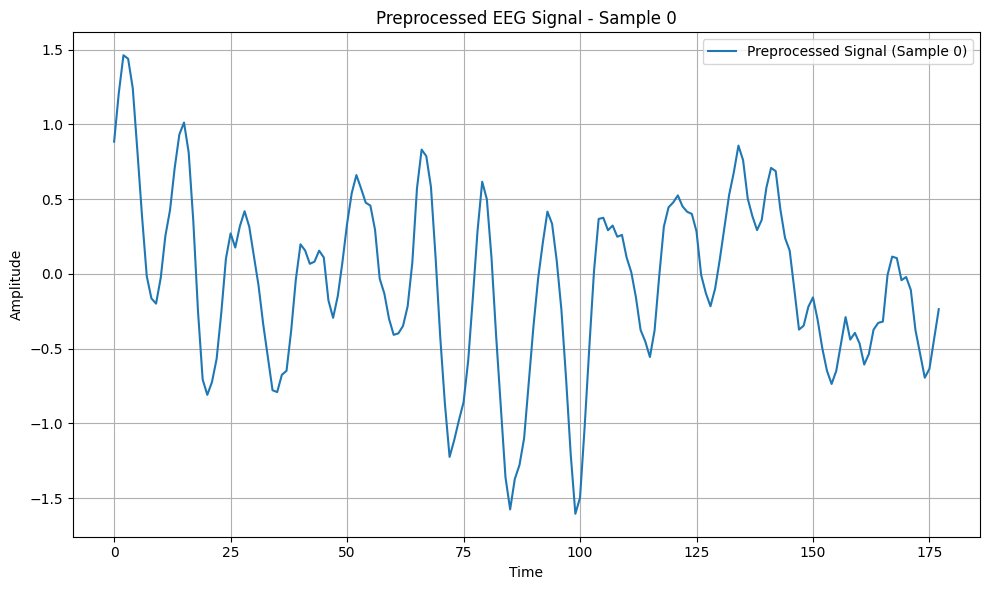

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = ""  # Update to your file path
data = pd.read_csv(file_path)

# Separate features (EEG signals) and labels
X = data.iloc[:, :-1].values  # EEG signals (features)

# Preprocessing
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)  # Z-score normalization

# Clip the signals to ±3 to handle outliers
clip_threshold = 3
X_clipped = np.clip(X_normalized, -clip_threshold, clip_threshold)

# Function to plot the preprocessed EEG signals
def plot_preprocessed_signal(preprocessed_signal, sample_idx):
    plt.figure(figsize=(10, 6))

    plt.plot(preprocessed_signal[sample_idx], label=f"Preprocessed Signal (Sample {sample_idx})")
    plt.title(f"Preprocessed EEG Signal - Sample {sample_idx}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

# Select a sample to visualize
sample_idx = 0  # Select the first sample (modify as needed)

# Plot the preprocessed signal
plot_preprocessed_signal(X_clipped, sample_idx)


## <font color="skyblue">**LeNet**</font>


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.7197 - loss: 1.2409 - val_accuracy: 0.9418 - val_loss: 0.2447
Epoch 2/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9474 - loss: 0.2523 - val_accuracy: 0.9375 - val_loss: 0.2649
Epoch 3/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9492 - loss: 0.2189 - val_accuracy: 0.9457 - val_loss: 0.1992
Epoch 4/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9457 - loss: 0.2089 - val_accuracy: 0.9473 - val_loss: 0.1928
Epoch 5/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9592 - loss: 0.1878 - val_accuracy: 0.9462 - val_loss: 0.2004
Epoch 6/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9514 - loss: 0.1912 - val_accuracy: 0.9516 - val_loss: 0.1723
Epoch 7/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9575 - loss: 0.1741 - val_accuracy: 0.9489 - val_loss: 0.1719
Epoch 8/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9482 - loss: 0.1819 - val_

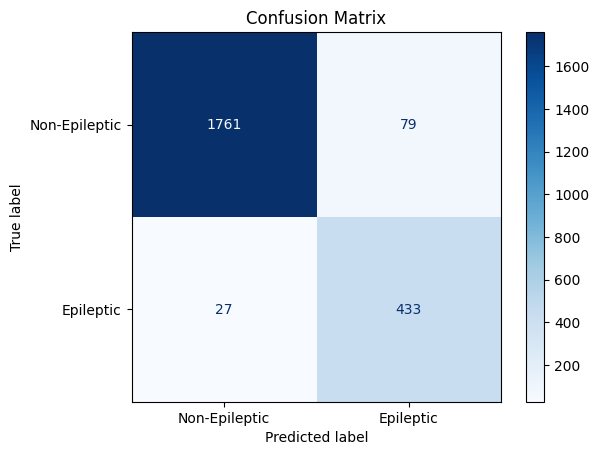

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


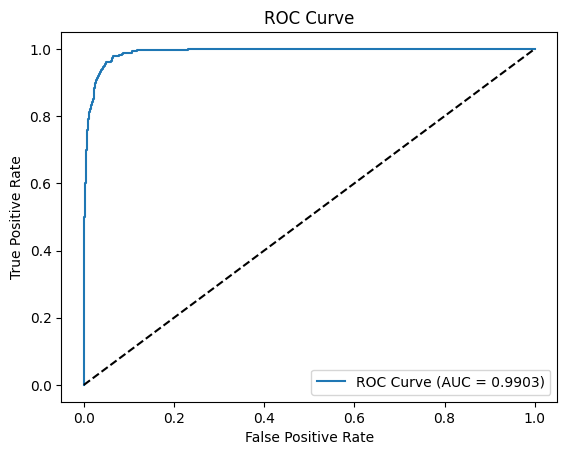

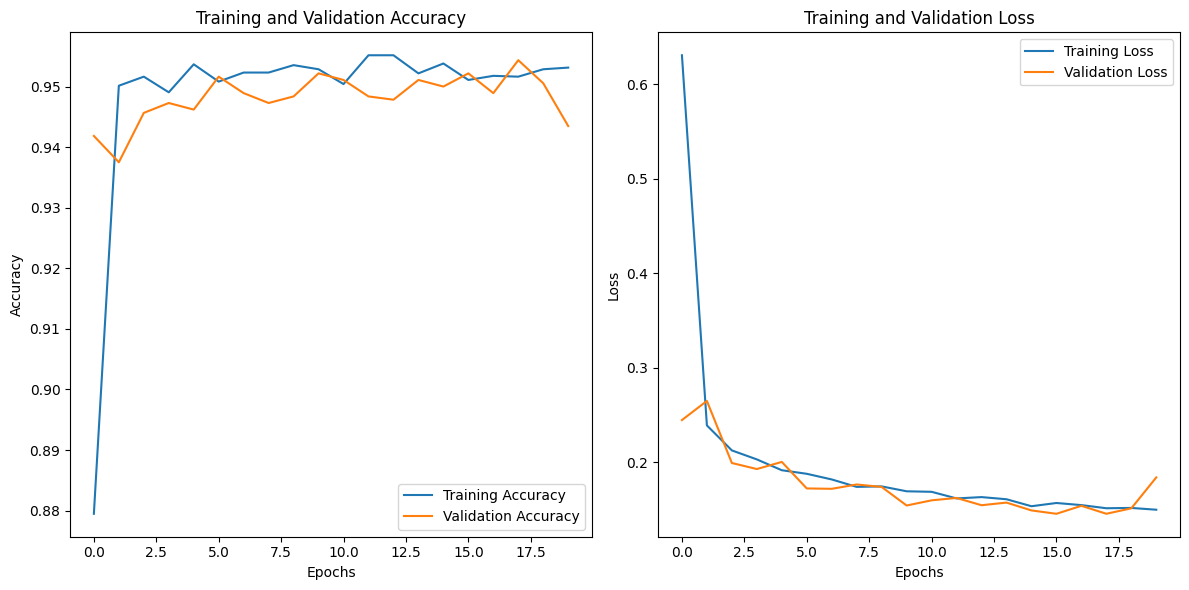

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
file_path = ""  # Update to your file path
data = pd.read_csv(file_path)

# Preprocessing
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Target

# Convert target to binary
y_binary = np.where(y == 1, 1, 0)

# Normalize with Z-score and handle outliers
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
clip_threshold = 3
X_clipped = np.clip(X_normalized, -clip_threshold, clip_threshold)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_clipped, y_binary, test_size=0.2, random_state=42, stratify=y_binary)

# Reshape for Conv1D
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_binary), y=y_binary)
class_weights_dict = dict(enumerate(class_weights))

# Define LeNet model
def build_lenet(input_shape):
    model = Sequential([
        Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.01)),
        MaxPooling1D(pool_size=2),
        Conv1D(64, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Build and train LeNet
lenet_model = build_lenet(input_shape=(X_train.shape[1], 1))
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = lenet_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    class_weight=class_weights_dict,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate LeNet
train_loss, train_accuracy = lenet_model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = lenet_model.evaluate(X_test, y_test, verbose=0)
print(f"LeNet Training Accuracy: {train_accuracy:.2f}")
print(f"LeNet Testing Accuracy: {test_accuracy:.2f}")

# Predictions and Metrics
y_pred = (lenet_model.predict(X_test) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

print("\nLeNet Classification Report:\n", classification_report(y_test, y_pred, digits=4))
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Specificity: {specificity:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")

# ROC-AUC Score
auc = roc_auc_score(y_test, lenet_model.predict(X_test))
print(f"LeNet Test ROC-AUC: {auc:.4f}")

# Visualization: Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Non-Epileptic", "Epileptic"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Visualization: ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, lenet_model.predict(X_test))
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Visualization: Training and Validation Accuracy and Loss
plt.figure(figsize=(12, 6))
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.tight_layout()
plt.show()


## <font color="orange">**AlexNet**</font>


Epoch 1/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 190s 804ms/step - accuracy: 0.9242 - loss: 28.0953 - val_accuracy: 0.7886 - val_loss: 4.2264 - learning_rate: 0.0010
Epoch 2/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 202s 806ms/step - accuracy: 0.9477 - loss: 2.4382 - val_accuracy: 0.9359 - val_loss: 0.8599 - learning_rate: 0.0010
Epoch 3/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 201s 803ms/step - accuracy: 0.9486 - loss: 0.6176 - val_accuracy: 0.9761 - val_loss: 0.3110 - learning_rate: 0.0010
Epoch 4/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 203s 809ms/step - accuracy: 0.9305 - loss: 0.3614 - val_accuracy: 0.9511 - val_loss: 0.3673 - learning_rate: 0.0010
Epoch 5/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 177s 770ms/step - accuracy: 0.9359 - loss: 0.3764 - val_accuracy: 0.9609 - val_loss: 0.3121 - learning_rate: 0.0010
Epoch 6/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 185s 804ms/step - accuracy: 0.9500 - loss: 0.3318 - val_accuracy: 0.9598 - val_loss: 0.3125 - learning_rate: 0.0010
Epoch 7/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 180s 783ms/step - accur

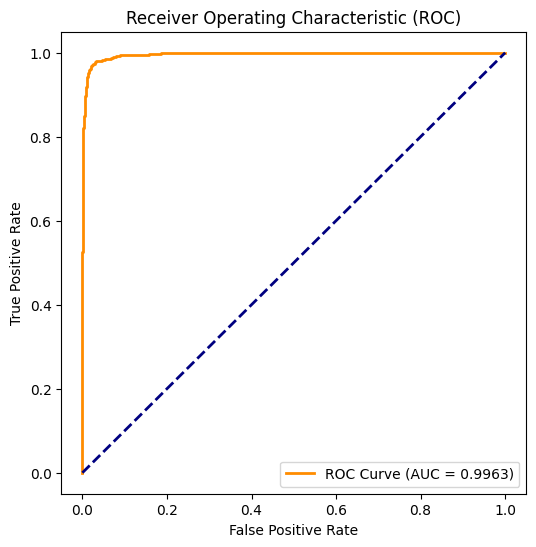

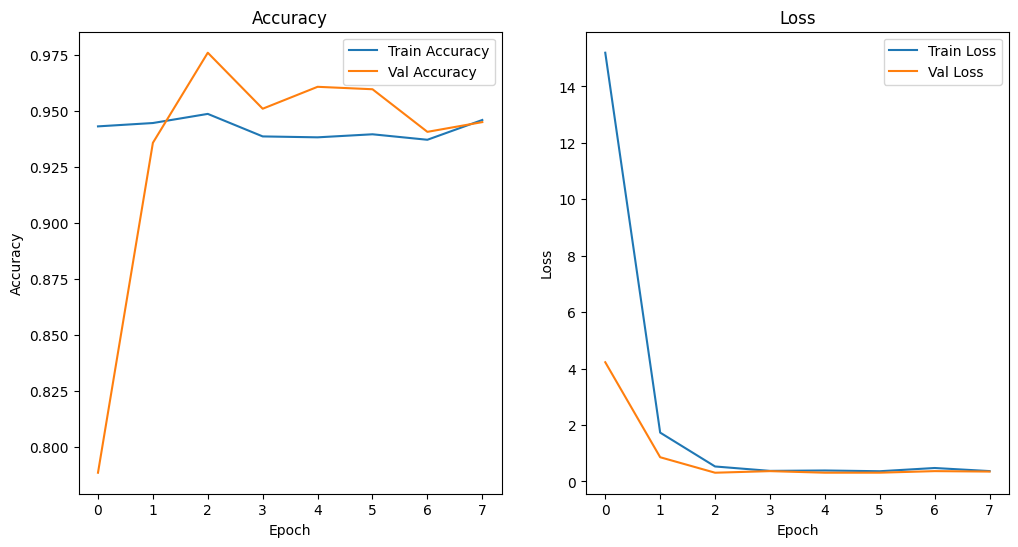

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
file_path = ""  # Update to your file path
data = pd.read_csv(file_path)

# Preprocessing
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Target

# Convert target to binary
y_binary = np.where(y == 1, 1, 0)

# Normalize with Z-score and handle outliers
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
clip_threshold = 3
X_clipped = np.clip(X_normalized, -clip_threshold, clip_threshold)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_clipped, y_binary, test_size=0.2, random_state=42, stratify=y_binary)

# Reshape for Conv1D
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_binary), y=y_binary)
class_weights_dict = dict(enumerate(class_weights))

# Define AlexNet model
def build_alexnet(input_shape):
    input_layer = Input(shape=input_shape)

    # First convolutional block
    x = Conv1D(96, kernel_size=11, strides=4, padding="valid", activation="relu", kernel_regularizer=l2(0.01))(input_layer)
    x = MaxPooling1D(pool_size=3, strides=2)(x)
    x = BatchNormalization()(x)

    # Second convolutional block
    x = Conv1D(256, kernel_size=5, padding="same", activation="relu", kernel_regularizer=l2(0.01))(x)
    x = MaxPooling1D(pool_size=3, strides=2)(x)
    x = BatchNormalization()(x)

    # Third convolutional block
    x = Conv1D(384, kernel_size=3, padding="same", activation="relu", kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)

    # Fourth convolutional block
    x = Conv1D(384, kernel_size=3, padding="same", activation="relu", kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)

    # Fifth convolutional block
    x = Conv1D(256, kernel_size=3, padding="same", activation="relu", kernel_regularizer=l2(0.01))(x)
    x = MaxPooling1D(pool_size=3, strides=2)(x)
    x = BatchNormalization()(x)

    # Flatten the output of convolutional layers
    x = Flatten()(x)

    # Fully connected layers
    x = Dense(4096, activation="relu", kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.6)(x)  # Increased dropout rate to 60%

    x = Dense(4096, activation="relu", kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.6)(x)  # Increased dropout rate to 60%

    output_layer = Dense(1, activation="sigmoid")(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])
    return model

# Learning Rate Scheduler
def lr_schedule(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.5  # Reduce learning rate after 10 epochs

# Build and train AlexNet
alexnet_model = build_alexnet(input_shape=(X_train.shape[1], 1))
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Callbacks
lr_scheduler = LearningRateScheduler(lr_schedule)

history = alexnet_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,  # Increased epochs to allow more training time with adjustments
    batch_size=32,
    class_weight=class_weights_dict,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

# Evaluate and Report Results
train_loss, train_accuracy = alexnet_model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = alexnet_model.evaluate(X_test, y_test, verbose=0)

print(f"AlexNet Training Accuracy: {train_accuracy:.4f}")
print(f"AlexNet Testing Accuracy: {test_accuracy:.4f}")

# Predictions and ROC-AUC
y_pred = (alexnet_model.predict(X_test) > 0.5).astype(int)
y_pred_prob = alexnet_model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print(f"ROC-AUC: {roc_auc:.4f}")

# Confusion Matrix with Sensitivity and Specificity
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"Confusion Matrix:\n{cm}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

# Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()

# Plot Training History
plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.show()


## <font color="#FF5B87">**GoogleNet**</font>


Epoch 1/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 157s 563ms/step - accuracy: 0.9072 - loss: 29.3532 - val_accuracy: 0.8266 - val_loss: 4.4738 - learning_rate: 0.0010
Epoch 2/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 125s 489ms/step - accuracy: 0.9567 - loss: 3.0833 - val_accuracy: 0.9342 - val_loss: 1.2515 - learning_rate: 0.0010
Epoch 3/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 150s 524ms/step - accuracy: 0.9593 - loss: 0.9524 - val_accuracy: 0.9788 - val_loss: 0.4830 - learning_rate: 0.0010
Epoch 4/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 134s 490ms/step - accuracy: 0.9514 - loss: 0.4761 - val_accuracy: 0.9712 - val_loss: 0.2855 - learning_rate: 0.0010
Epoch 5/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 138s 473ms/step - accuracy: 0.9592 - loss: 0.2870 - val_accuracy: 0.9587 - val_loss: 0.2245 - learning_rate: 0.0010
Epoch 6/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 142s 473ms/step - accuracy: 0.9583 - loss: 0.2237 - val_accuracy: 0.9658 - val_loss: 0.1742 - learning_rate: 0.0010
Epoch 7/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 108s 470ms/step - accur

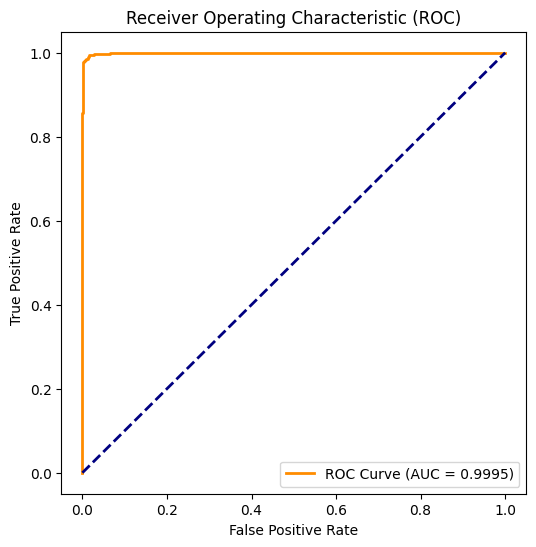

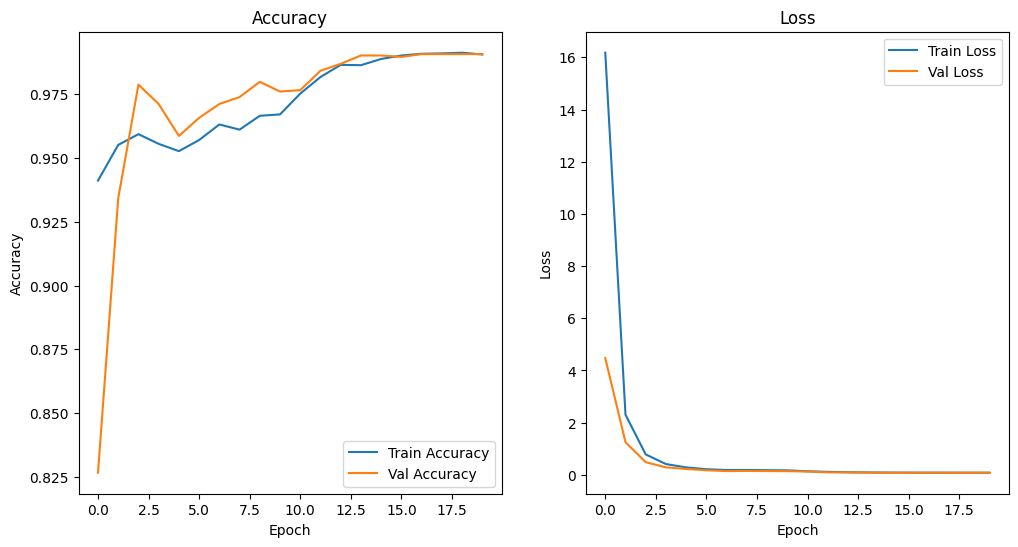

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv1D, MaxPooling1D, AveragePooling1D, Flatten, Dense, Dropout, concatenate, BatchNormalization
)
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
file_path = ""  # Update to your file path
data = pd.read_csv(file_path)

# Preprocessing
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Target

# Convert target to binary
y_binary = np.where(y == 1, 1, 0)

# Normalize with Z-score and handle outliers
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
clip_threshold = 3
X_clipped = np.clip(X_normalized, -clip_threshold, clip_threshold)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_clipped, y_binary, test_size=0.2, random_state=42, stratify=y_binary)

# Reshape for Conv1D
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_binary), y=y_binary)
class_weights_dict = dict(enumerate(class_weights))

# Define Inception Module
def inception_module(x, filters):
    # 1x1 Convolution
    conv1x1 = Conv1D(filters[0], kernel_size=1, padding="same", activation="relu", kernel_regularizer=l2(0.01))(x)

    # 3x3 Convolution
    conv3x3 = Conv1D(filters[1], kernel_size=3, padding="same", activation="relu", kernel_regularizer=l2(0.01))(x)

    # 5x5 Convolution
    conv5x5 = Conv1D(filters[2], kernel_size=5, padding="same", activation="relu", kernel_regularizer=l2(0.01))(x)

    # MaxPooling with 1x1 convolution projection
    maxpool = MaxPooling1D(pool_size=3, strides=1, padding="same")(x)
    maxpool_proj = Conv1D(filters[3], kernel_size=1, padding="same", activation="relu", kernel_regularizer=l2(0.01))(maxpool)

    # Concatenate all outputs
    return concatenate([conv1x1, conv3x3, conv5x5, maxpool_proj])

# Define GoogLeNet model
def build_googlenet(input_shape):
    input_layer = Input(shape=input_shape)

    # Initial convolutional layers
    x = Conv1D(64, kernel_size=7, strides=2, padding="same", activation="relu", kernel_regularizer=l2(0.01))(input_layer)
    x = MaxPooling1D(pool_size=3, strides=2, padding="same")(x)
    x = BatchNormalization()(x)

    x = Conv1D(192, kernel_size=3, padding="same", activation="relu", kernel_regularizer=l2(0.01))(x)
    x = MaxPooling1D(pool_size=3, strides=2, padding="same")(x)
    x = BatchNormalization()(x)

    # Inception blocks
    x = inception_module(x, [64, 128, 32, 32])
    x = inception_module(x, [128, 192, 96, 64])
    x = MaxPooling1D(pool_size=3, strides=2, padding="same")(x)

    x = inception_module(x, [192, 208, 48, 64])
    x = inception_module(x, [160, 224, 64, 64])
    x = inception_module(x, [128, 256, 64, 64])
    x = MaxPooling1D(pool_size=3, strides=2, padding="same")(x)

    x = inception_module(x, [256, 320, 128, 128])
    x = AveragePooling1D(pool_size=3, strides=1)(x)

    # Fully connected layers
    x = Flatten()(x)
    x = Dense(1024, activation="relu", kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.6)(x)  # Increased dropout to prevent overfitting
    output_layer = Dense(1, activation="sigmoid")(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])
    return model

# Learning Rate Scheduler
def lr_schedule(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.5  # Reduce learning rate after 10 epochs

# Build and train GoogLeNet
googlenet_model = build_googlenet(input_shape=(X_train.shape[1], 1))
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Callbacks
lr_scheduler = LearningRateScheduler(lr_schedule)

history = googlenet_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,  # Increased epochs to allow for more training time
    batch_size=32,
    class_weight=class_weights_dict,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

# Evaluate and Report Results
train_loss, train_accuracy = googlenet_model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = googlenet_model.evaluate(X_test, y_test, verbose=0)

print(f"GoogLeNet Training Accuracy: {train_accuracy:.4f}")
print(f"GoogLeNet Testing Accuracy: {test_accuracy:.4f}")

# Predictions and ROC-AUC
y_pred = (googlenet_model.predict(X_test) > 0.5).astype(int)
y_pred_prob = googlenet_model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print(f"ROC-AUC: {roc_auc:.4f}")

# Confusion Matrix with Sensitivity and Specificity
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"Confusion Matrix:\n{cm}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

# Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()

# Plot Training History
plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.show()


## <font color="#A0FF9A">**ResNet**</font>


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 116s 469ms/step - accuracy: 0.9114 - loss: 8.0533 - val_accuracy: 0.8554 - val_loss: 3.9922 - learning_rate: 0.0010
Epoch 2/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 125s 396ms/step - accuracy: 0.9386 - loss: 3.2412 - val_accuracy: 0.9304 - val_loss: 1.8609 - learning_rate: 0.0010
Epoch 3/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 140s 387ms/step - accuracy: 0.9416 - loss: 1.5513 - val_accuracy: 0.9538 - val_loss: 0.9829 - learning_rate: 0.0010
Epoch 4/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 85s 369ms/step - accuracy: 0.9435 - loss: 0.8789 - val_accuracy: 0.9304 - val_loss: 0.6819 - learning_rate: 0.0010
Epoch 5/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 151s 407ms/step - accuracy: 0.9391 - loss: 0.6329 - val_accuracy: 0.9408 - val_loss: 0.4448 - learning_rate: 0.0010
Epoch 6/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 91s 396ms/step - accuracy: 0.9430 - loss: 0.4741 - val_accuracy: 0.9511 - val_loss: 0.4413 - learning_rate: 0.0010
Epoch 7/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 141s 394ms/step - accuracy

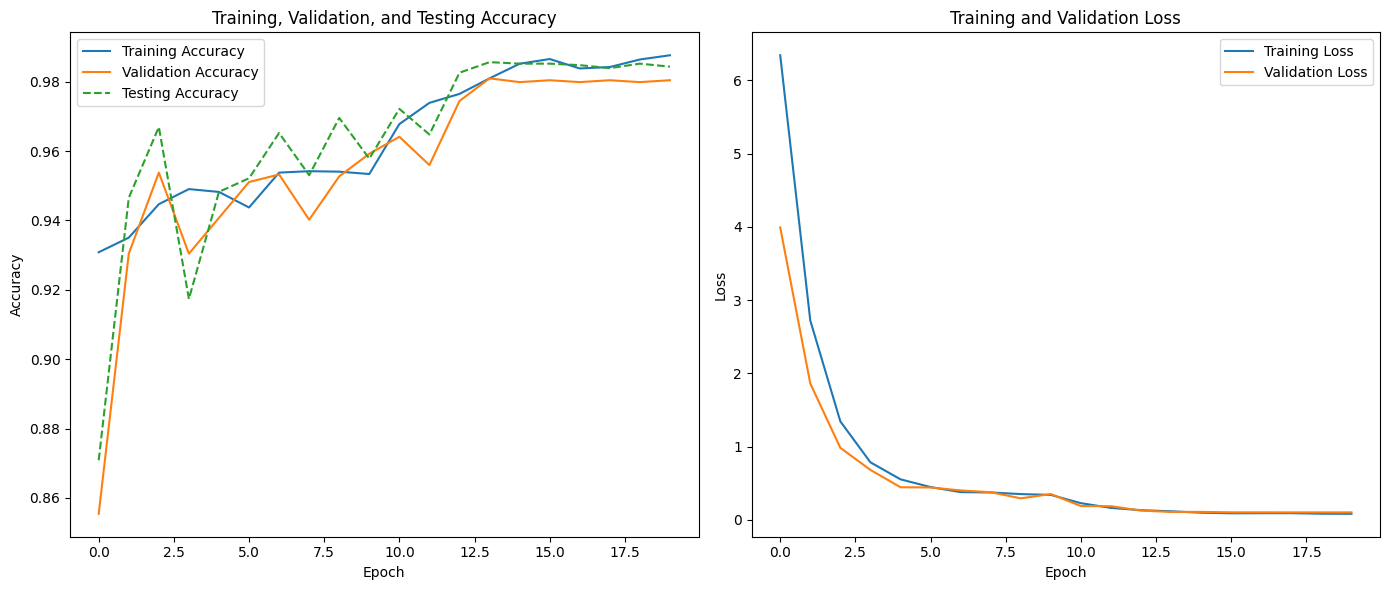

72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step


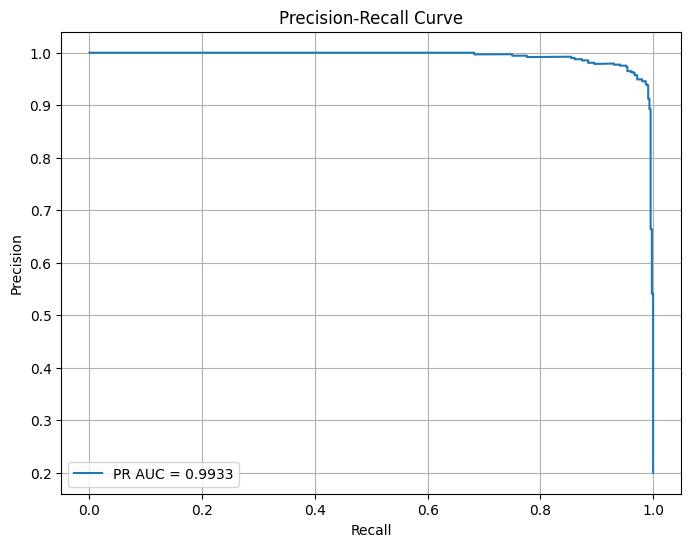

72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step


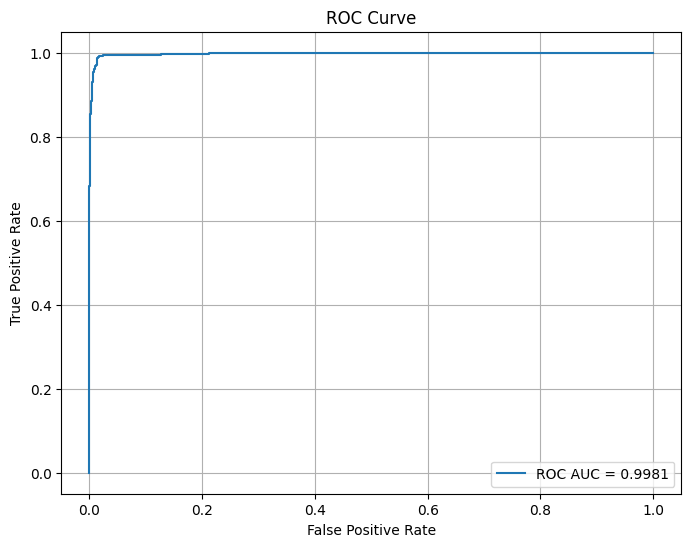

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Add, BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, Callback
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
file_path = ""  # Update to your file path
data = pd.read_csv(file_path)

# Preprocessing
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Target

# Convert target to binary
y_binary = np.where(y == 1, 1, 0)

# Normalize with Z-score and handle outliers
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
clip_threshold = 3
X_clipped = np.clip(X_normalized, -clip_threshold, clip_threshold)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_clipped, y_binary, test_size=0.2, random_state=42, stratify=y_binary)

# Reshape for Conv1D
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_binary), y=y_binary)
class_weights_dict = dict(enumerate(class_weights))

# Callback to track testing accuracy
class TestAccuracyCallback(Callback):
    def __init__(self, test_data):
        self.test_data = test_data
        self.test_accuracy = []

    def on_epoch_end(self, epoch, logs=None):
        X_test, y_test = self.test_data
        _, acc = self.model.evaluate(X_test, y_test, verbose=0)
        self.test_accuracy.append(acc)

# Learning Rate Scheduler
def lr_schedule(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.5  # Reduce learning rate after 10 epochs

# ResNet-inspired model
def build_further_optimized_resnet(input_shape):
    def residual_block(input_tensor, filters, kernel_size=3, strides=1, l2_reg=0.005):
        x = Conv1D(filters, kernel_size, strides=strides, padding="same", kernel_regularizer=l2(l2_reg))(input_tensor)
        x = BatchNormalization()(x)
        x = LeakyReLU(alpha=0.1)(x)  # Use LeakyReLU to prevent dead neurons
        x = Conv1D(filters, kernel_size, strides=1, padding="same", kernel_regularizer=l2(l2_reg))(x)
        x = BatchNormalization()(x)

        shortcut = Conv1D(filters, kernel_size=1, strides=strides, padding="same", kernel_regularizer=l2(l2_reg))(input_tensor)
        shortcut = BatchNormalization()(shortcut)

        x = Add()([x, shortcut])
        x = LeakyReLU(alpha=0.1)(x)
        return x

    input_layer = Input(shape=input_shape)
    x = Conv1D(64, kernel_size=3, activation=None, kernel_regularizer=l2(0.005))(input_layer)
    x = LeakyReLU(alpha=0.1)(x)
    x = MaxPooling1D(pool_size=2)(x)

    # Residual blocks
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=128)
    x = residual_block(x, filters=256)

    x = Flatten()(x)
    x = Dense(256, activation=None, kernel_regularizer=l2(0.005))(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = Dropout(0.5)(x)  # Dropout for regularization
    output_layer = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Build the further optimized ResNet model
further_optimized_resnet_model = build_further_optimized_resnet(input_shape=(X_train.shape[1], 1))
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
test_acc_callback = TestAccuracyCallback(test_data=(X_test, y_test))
lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model
history = further_optimized_resnet_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,  # Increased epochs
    batch_size=32,
    class_weight=class_weights_dict,
    callbacks=[early_stopping, lr_scheduler, test_acc_callback],
    verbose=1
)

# Evaluate ResNet
train_loss, train_accuracy = further_optimized_resnet_model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = further_optimized_resnet_model.evaluate(X_test, y_test, verbose=0)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Predictions and Confusion Matrix
y_pred = (further_optimized_resnet_model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Sensitivity and Specificity
sensitivity = tp / (tp + fn)  # Sensitivity = TP / (TP + FN)
specificity = tn / (tn + fp)  # Specificity = TN / (TN + FP)

print(f"\nConfusion Matrix:\n{cm}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

# Classification report and ROC-AUC
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))
auc_score = roc_auc_score(y_test, further_optimized_resnet_model.predict(X_test))
print(f"Test ROC-AUC: {auc_score:.4f}")

# Plot Training, Validation, and Testing Accuracy
plt.figure(figsize=(14, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(test_acc_callback.test_accuracy, label='Testing Accuracy', linestyle='--')
plt.title('Training, Validation, and Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, further_optimized_resnet_model.predict(X_test))
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.4f}")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, further_optimized_resnet_model.predict(X_test))
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.4f}")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


ROC

Epoch 1/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 127s 498ms/step - accuracy: 0.8791 - loss: 30.7461 - val_accuracy: 0.8620 - val_loss: 6.3140 - learning_rate: 0.0010
Epoch 2/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 142s 498ms/step - accuracy: 0.9537 - loss: 4.6250 - val_accuracy: 0.9266 - val_loss: 2.0010 - learning_rate: 0.0010
Epoch 3/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 143s 504ms/step - accuracy: 0.9532 - loss: 1.5429 - val_accuracy: 0.9386 - val_loss: 0.8200 - learning_rate: 0.0010
Epoch 4/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 142s 506ms/step - accuracy: 0.9621 - loss: 0.6580 - val_accuracy: 0.9641 - val_loss: 0.4025 - learning_rate: 0.0010
Epoch 5/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 113s 492ms/step - accuracy: 0.9580 - loss: 0.3729 - val_accuracy: 0.9717 - val_loss: 0.2403 - learning_rate: 0.0010
Epoch 6/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 144s 500ms/step - accuracy: 0.9630 - loss: 0.2418 - val_accuracy: 0.9440 - val_loss: 0.2535 - learning_rate: 0.0010
Epoch 7/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 139s 487ms/step - accur

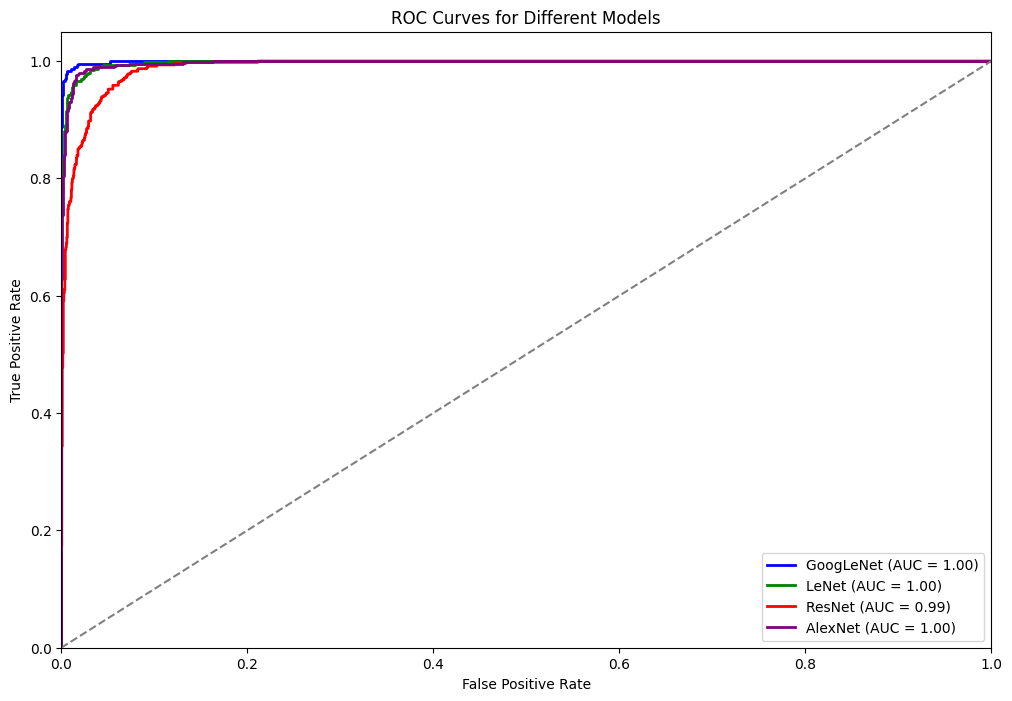

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D,AveragePooling1D , MaxPooling1D, Flatten, Dense, Dropout, concatenate, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler


# Load the dataset
file_path = "/content/drive/MyDrive/epileptic data/epilepticdata.csv"  # Update to your file path
data = pd.read_csv(file_path)

# Preprocessing
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Target

# Convert target to binary
y_binary = np.where(y == 1, 1, 0)

# Normalize with Z-score and handle outliers
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
clip_threshold = 3
X_clipped = np.clip(X_normalized, -clip_threshold, clip_threshold)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_clipped, y_binary, test_size=0.2, random_state=42, stratify=y_binary)

# Reshape for Conv1D
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_binary), y=y_binary)
class_weights_dict = dict(enumerate(class_weights))


# --- Define GoogLeNet ---
def inception_module(x, filters):
    conv1x1 = Conv1D(filters[0], kernel_size=1, padding="same", activation="relu", kernel_regularizer=l2(0.01))(x)
    conv3x3 = Conv1D(filters[1], kernel_size=3, padding="same", activation="relu", kernel_regularizer=l2(0.01))(x)
    conv5x5 = Conv1D(filters[2], kernel_size=5, padding="same", activation="relu", kernel_regularizer=l2(0.01))(x)
    maxpool = MaxPooling1D(pool_size=3, strides=1, padding="same")(x)
    maxpool_proj = Conv1D(filters[3], kernel_size=1, padding="same", activation="relu", kernel_regularizer=l2(0.01))(maxpool)
    return concatenate([conv1x1, conv3x3, conv5x5, maxpool_proj])


def build_googlenet(input_shape):
    input_layer = Input(shape=input_shape)
    x = Conv1D(64, kernel_size=7, strides=2, padding="same", activation="relu", kernel_regularizer=l2(0.01))(input_layer)
    x = MaxPooling1D(pool_size=3, strides=2, padding="same")(x)
    x = BatchNormalization()(x)
    x = Conv1D(192, kernel_size=3, padding="same", activation="relu", kernel_regularizer=l2(0.01))(x)
    x = MaxPooling1D(pool_size=3, strides=2, padding="same")(x)
    x = BatchNormalization()(x)
    x = inception_module(x, [64, 128, 32, 32])
    x = inception_module(x, [128, 192, 96, 64])
    x = MaxPooling1D(pool_size=3, strides=2, padding="same")(x)
    x = inception_module(x, [192, 208, 48, 64])
    x = inception_module(x, [160, 224, 64, 64])
    x = inception_module(x, [128, 256, 64, 64])
    x = MaxPooling1D(pool_size=3, strides=2, padding="same")(x)
    x = inception_module(x, [256, 320, 128, 128])
    x = AveragePooling1D(pool_size=3, strides=1)(x)
    x = Flatten()(x)
    x = Dense(1024, activation="relu", kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.6)(x)
    output_layer = Dense(1, activation="sigmoid")(x)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])
    return model


# --- Define LeNet ---
def build_lenet(input_shape):
    input_layer = Input(shape=input_shape)
    x = Conv1D(32, kernel_size=5, activation="relu", padding="same")(input_layer)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(64, kernel_size=5, activation="relu", padding="same")(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Flatten()(x)
    x = Dense(128, activation="relu")(x)
    output_layer = Dense(1, activation="sigmoid")(x)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])
    return model


# --- Define ResNet ---
def build_resnet(input_shape):
    input_layer = Input(shape=input_shape)
    x = Conv1D(64, kernel_size=3, padding="same", activation="relu")(input_layer)
    x = MaxPooling1D(pool_size=2)(x)
    x = Flatten()(x)
    x = Dense(1, activation="sigmoid")(x)
    model = Model(inputs=input_layer, outputs=x)
    model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])
    return model


# --- Define AlexNet ---
def build_alexnet(input_shape):
    input_layer = Input(shape=input_shape)
    x = Conv1D(96, kernel_size=11, strides=4, padding="valid", activation="relu")(input_layer)
    x = MaxPooling1D(pool_size=3, strides=2)(x)
    x = Conv1D(256, kernel_size=5, padding="same", activation="relu")(x)
    x = MaxPooling1D(pool_size=3, strides=2)(x)
    x = Conv1D(384, kernel_size=3, padding="same", activation="relu")(x)
    x = Conv1D(384, kernel_size=3, padding="same", activation="relu")(x)
    x = Conv1D(256, kernel_size=3, padding="same", activation="relu")(x)
    x = MaxPooling1D(pool_size=3, strides=2)(x)
    x = Flatten()(x)
    x = Dense(4096, activation="relu")(x)
    x = Dropout(0.5)(x)
    x = Dense(4096, activation="relu")(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(1, activation="sigmoid")(x)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])
    return model


# Learning Rate Scheduler
def lr_schedule(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.5


# Build models
googlenet_model = build_googlenet(input_shape=(X_train.shape[1], 1))
lenet_model = build_lenet(input_shape=(X_train.shape[1], 1))
resnet_model = build_resnet(input_shape=(X_train.shape[1], 1))
alexnet_model = build_alexnet(input_shape=(X_train.shape[1], 1))

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(lr_schedule)

# Train models
googlenet_history = googlenet_model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, class_weight=class_weights_dict, callbacks=[early_stopping, lr_scheduler], verbose=1)
lenet_history = lenet_model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, class_weight=class_weights_dict, callbacks=[early_stopping, lr_scheduler], verbose=1)
resnet_history = resnet_model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, class_weight=class_weights_dict, callbacks=[early_stopping, lr_scheduler], verbose=1)
alexnet_history = alexnet_model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, class_weight=class_weights_dict, callbacks=[early_stopping, lr_scheduler], verbose=1)

# Predict for ROC Curve
y_pred_googlenet = googlenet_model.predict(X_test)
y_pred_lenet = lenet_model.predict(X_test)
y_pred_resnet = resnet_model.predict(X_test)
y_pred_alexnet = alexnet_model.predict(X_test)

# Calculate ROC curves and AUCs
fpr_googlenet, tpr_googlenet, _ = roc_curve(y_test, y_pred_googlenet)
fpr_lenet, tpr_lenet, _ = roc_curve(y_test, y_pred_lenet)
fpr_resnet, tpr_resnet, _ = roc_curve(y_test, y_pred_resnet)
fpr_alexnet, tpr_alexnet, _ = roc_curve(y_test, y_pred_alexnet)

roc_auc_googlenet = auc(fpr_googlenet, tpr_googlenet)
roc_auc_lenet = auc(fpr_lenet, tpr_lenet)
roc_auc_resnet = auc(fpr_resnet, tpr_resnet)
roc_auc_alexnet = auc(fpr_alexnet, tpr_alexnet)

# Plot ROC Curves for all models in one image
plt.figure(figsize=(12, 8))

plt.plot(fpr_googlenet, tpr_googlenet, color='blue', lw=2, label=f'GoogLeNet (AUC = {roc_auc_googlenet:.2f})')
plt.plot(fpr_lenet, tpr_lenet, color='green', lw=2, label=f'LeNet (AUC = {roc_auc_lenet:.2f})')
plt.plot(fpr_resnet, tpr_resnet, color='red', lw=2, label=f'ResNet (AUC = {roc_auc_resnet:.2f})')
plt.plot(fpr_alexnet, tpr_alexnet, color='purple', lw=2, label=f'AlexNet (AUC = {roc_auc_alexnet:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (chance level)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')

plt.show()


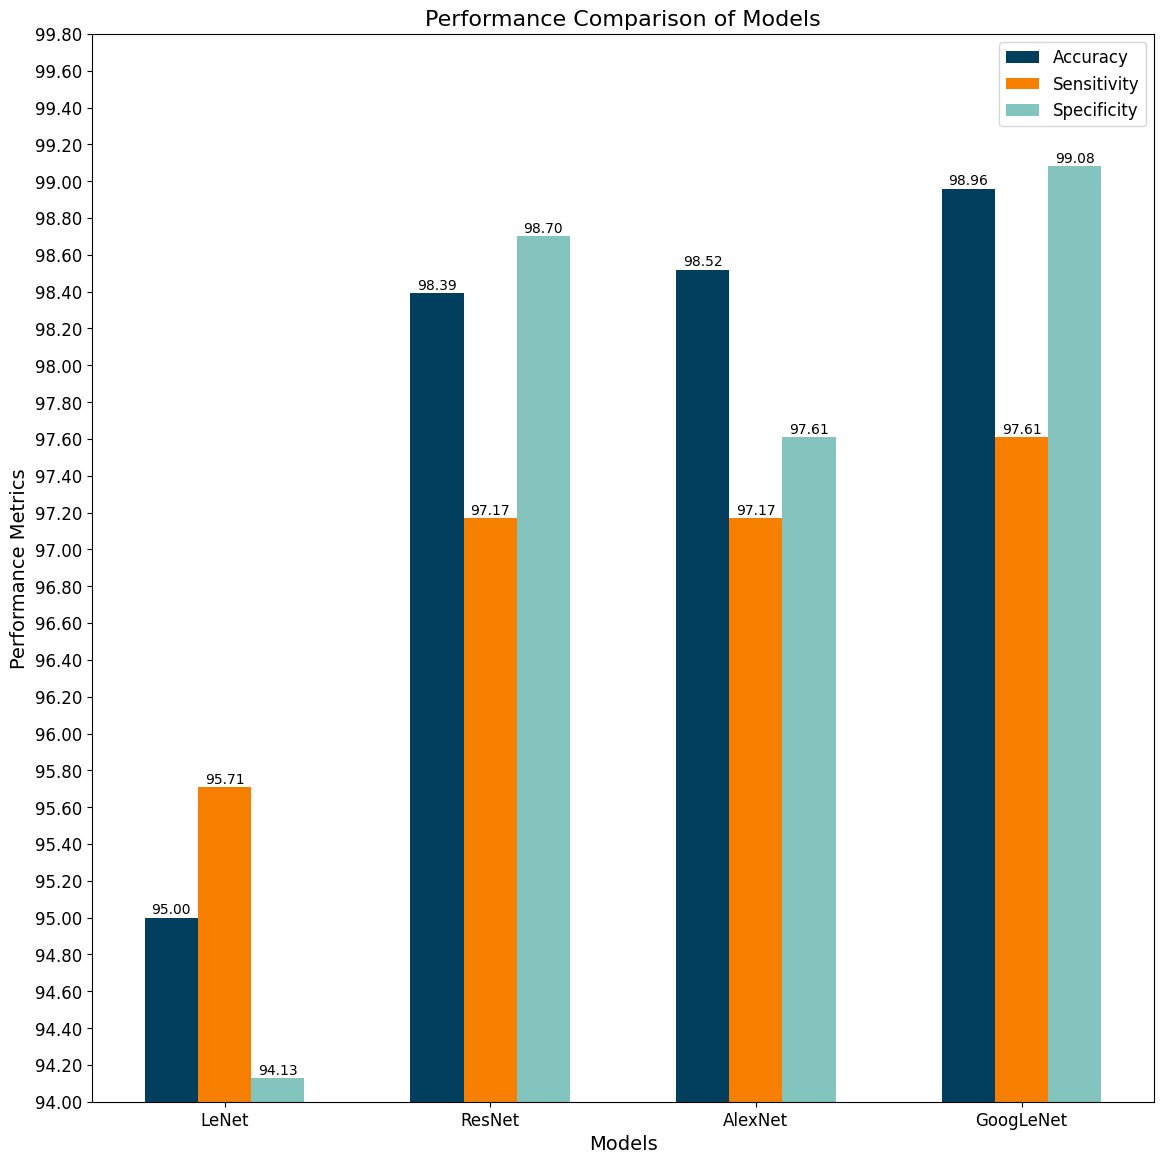

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['LeNet', 'ResNet', 'AlexNet', 'GoogLeNet']
accuracy = [95, 98.39, 98.52, 98.96]
sensitivity = [95.71, 97.17, 97.17, 97.61]
specificity = [94.13, 98.70, 97.61, 99.08]

x = np.arange(len(models))  # Positions for groups of bars
width = 0.2

# Create plot
fig, ax = plt.subplots(figsize=(12, 12))  # Increased figure height for more vertical space

# Plot bars for all models and parameters
bars1 = ax.bar(x - width, accuracy, width, label='Accuracy', color='#023F5F')
bars2 = ax.bar(x, sensitivity, width, label='Sensitivity', color='#f77f00')
bars3 = ax.bar(x + width, specificity, width, label='Specificity', color='#83c5be')

# Add value labels on each bar
for i in range(len(models)):
    ax.text(x[i] - width, accuracy[i] + 0.02, f'{accuracy[i]:.2f}', ha='center', color='black', fontsize=10)
    ax.text(x[i], sensitivity[i] + 0.02, f'{sensitivity[i]:.2f}', ha='center', color='black', fontsize=10)
    ax.text(x[i] + width, specificity[i] + 0.02, f'{specificity[i]:.2f}', ha='center', color='black', fontsize=10)

# Adjust x-axis limits to create space between the bars and the y-axis
ax.set_xlim(-0.5, len(models) - 0.5)  # Add padding to the left and right ends

# Labels and Title
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Performance Metrics', fontsize=14)
ax.set_title('Performance Comparison of Models', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)
ax.legend(fontsize=12)

# Adjust y-axis limits for better visibility of differences
ax.set_ylim(94, 99.5)  # Range focused on accuracy differences

# Increase the interval between y-axis ticks
tick_positions = np.arange(94, 100, 0.2)  # Interval of 0.2 between ticks
ax.set_yticks(tick_positions)

# Adjust y-tick labels
ax.set_yticklabels([f'{x:.2f}' for x in tick_positions], fontsize=12)

# Adjust layout for better spacing
fig.subplots_adjust(left=0.15, bottom=0.1, right=0.9, top=0.9)  # Adjusted top padding for better spacing

# Ensure spacing and layout
fig.tight_layout(pad=2.0)  # Larger padding for clearer gaps

# Show plot
plt.show()


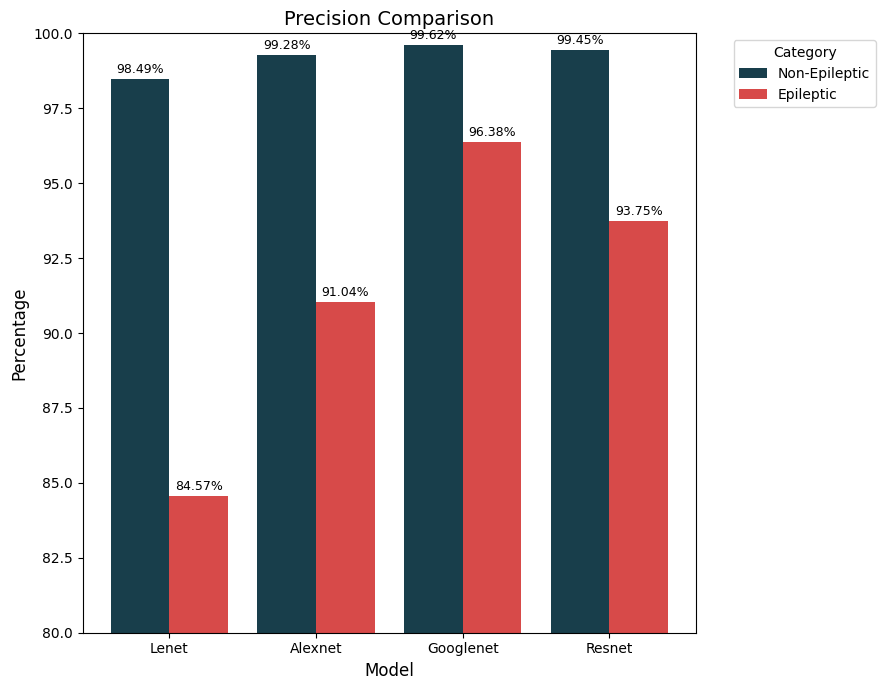

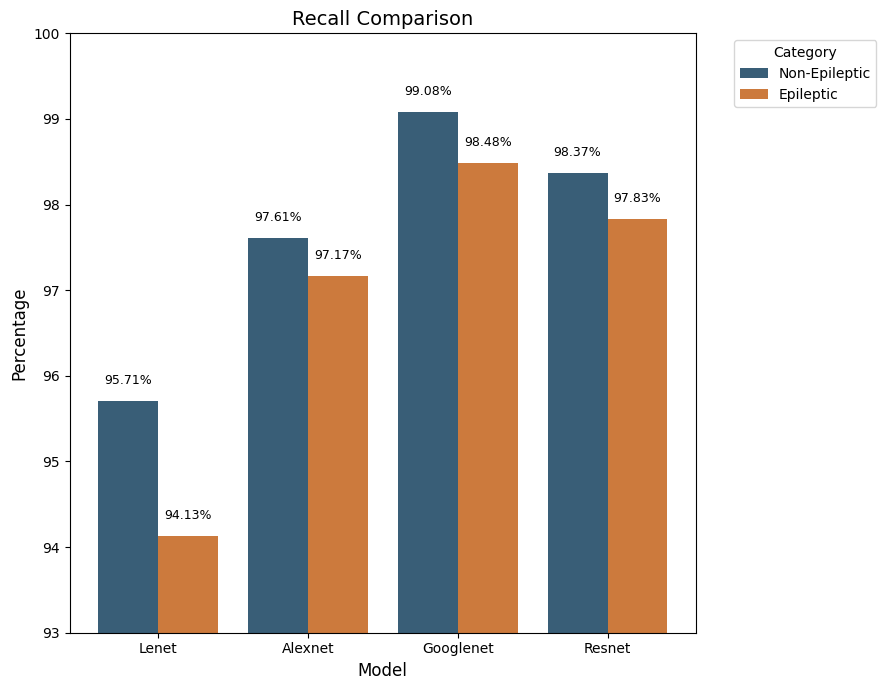

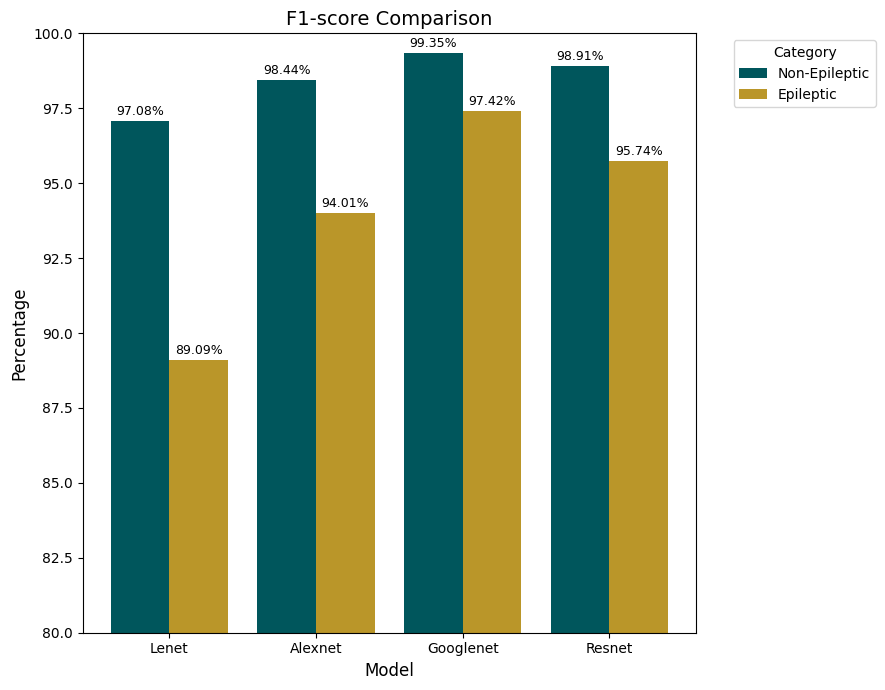

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the data
data = {
    'Model': ['Lenet', 'Alexnet', 'Googlenet', 'Resnet'],
    'Precision (Non-Epileptic)': [98.49, 99.28, 99.62, 99.45],
    'Precision (Epileptic)': [84.57, 91.04, 96.38, 93.75],
    'Recall (Non-Epileptic)': [95.71, 97.61, 99.08, 98.37],
    'Recall (Epileptic)': [94.13, 97.17, 98.48, 97.83],
    'F1-score (Non-Epileptic)': [97.08, 98.44, 99.35, 98.91],
    'F1-score (Epileptic)': [89.09, 94.01, 97.42, 95.74]
}

# Define custom colors for each metric
metric_colors = {
    'Precision': ['#183e4b', '#d74a49'],  # Colors for Precision
    'Recall': ['#395e77', '#cc7a3d'],    # Colors for Recall
    'F1-score': ['#00565c', '#ba9629']   # Colors for F1-score
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting
metrics = ['Precision', 'Recall', 'F1-score']
categories = ['Non-Epileptic', 'Epileptic']
x = np.arange(len(df['Model']))  # the label locations
width = 0.4  # Width of each bar

for metric in metrics:
    fig, ax = plt.subplots(figsize=(9, 7))
    colors = metric_colors[metric]  # Get colors for the current metric
    for i, category in enumerate(categories):
        bars = ax.bar(
            x + i * width - width / 2,  # Bars of the same model are placed together
            df[f'{metric} ({category})'],
            width,
            color=colors[i],  # Assign custom colors for the metric
            label=f'{category}'
        )

        # Annotating each bar with the percentage value
        for bar in bars:
            yval = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                yval + 0.2,  # Adjust position above the bar
                f'{yval:.2f}%',
                ha='center',
                fontsize=9
            )

    # Setting titles and labels
    ax.set_title(f'{metric} Comparison', fontsize=14)
    ax.set_xlabel('Model', fontsize=12)
    ax.set_ylabel('Percentage', fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(df['Model'], fontsize=10)

    # Adjust scaling for Recall to highlight differences
    if metric == 'Recall':
        ax.set_ylim(93, 100)  # Zoom in to highlight differences for Recall
    else:
        ax.set_ylim(80, 100)  # Default scaling for other metrics

    # Move the legend outside the graph at the top-right
    ax.legend(
        title='Category',
        fontsize=10,
        loc='upper left',
        bbox_to_anchor=(1.05, 1)  # Outside top-right corner
    )

    plt.tight_layout()
    plt.show()
